In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We load the data
insure_data = pd.read_csv('insurance_data.csv')

In [3]:
# We display the first 5 rows of the dataset
insure_data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
insure_data.replace('?', np.nan, inplace = True)

In [5]:
insure_data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
# describe the data
insure_data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
# show the data types
insure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# check for missing values
insure_data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

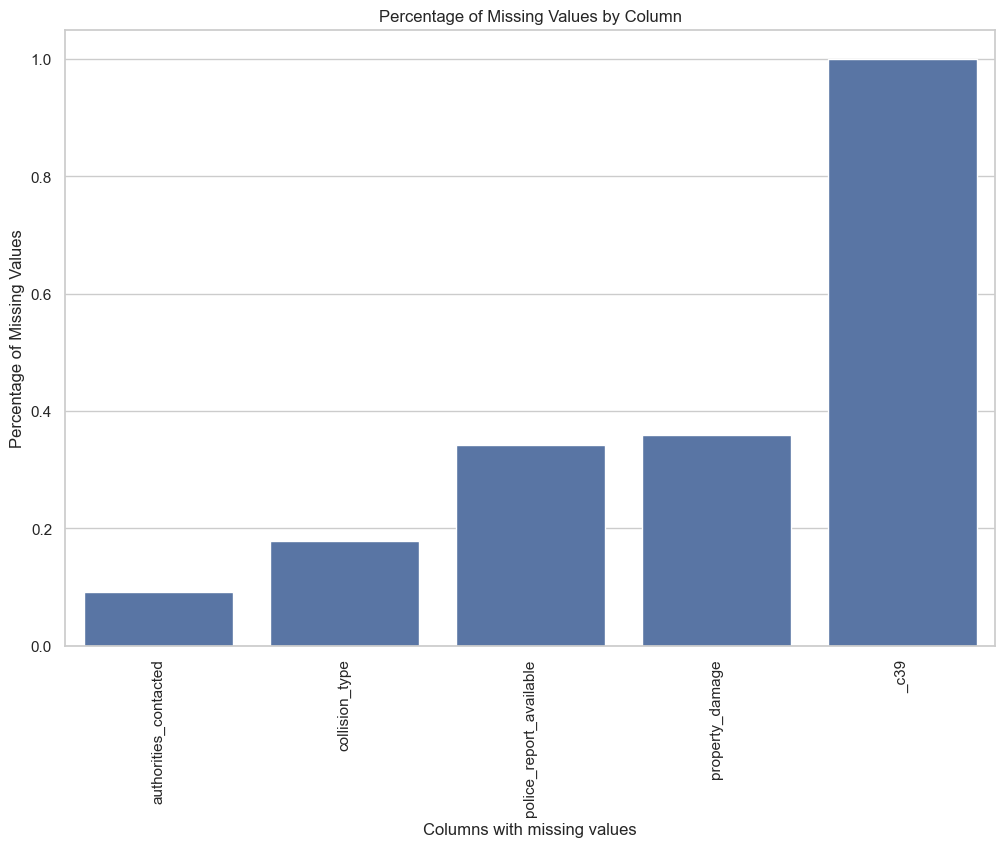

In [9]:
# Calculate the percentage of missing values for each column
missing = insure_data.isnull().sum() / len(insure_data)  # percentage
missing = missing[missing > 0]

# Sort the columns by the percentage of missing values
missing.sort_values(inplace=True)

# Convert the Series to a DataFrame and rename columns
missing = missing.to_frame()
missing.columns = ['Null_Count']
missing.index.names = ['Col_Name']
missing = missing.reset_index()

# Create a bar plot of the missing values percentage
sns.set(style='whitegrid', color_codes=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='Col_Name', y='Null_Count', data=missing)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns with missing values')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [10]:
# List of columns to fill with mode
columns_to_fill = ['collision_type', 'property_damage', 'police_report_available']

# Fill missing values with the mode for each specified column
for column in columns_to_fill:
    insure_data[column] = insure_data[column].fillna(insure_data[column].mode()[0])

In [11]:
# copy dataset 
insure_data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NO,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [12]:
# Get all the columns from the data that are not of type object and store them in a variable called numerical_columns
numerical_data = insure_data.select_dtypes(exclude='object')

# show the numerical columns
numerical_data


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,NaN
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,NaN
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,NaN
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,NaN
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006,NaN
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015,NaN
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996,NaN
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998,NaN


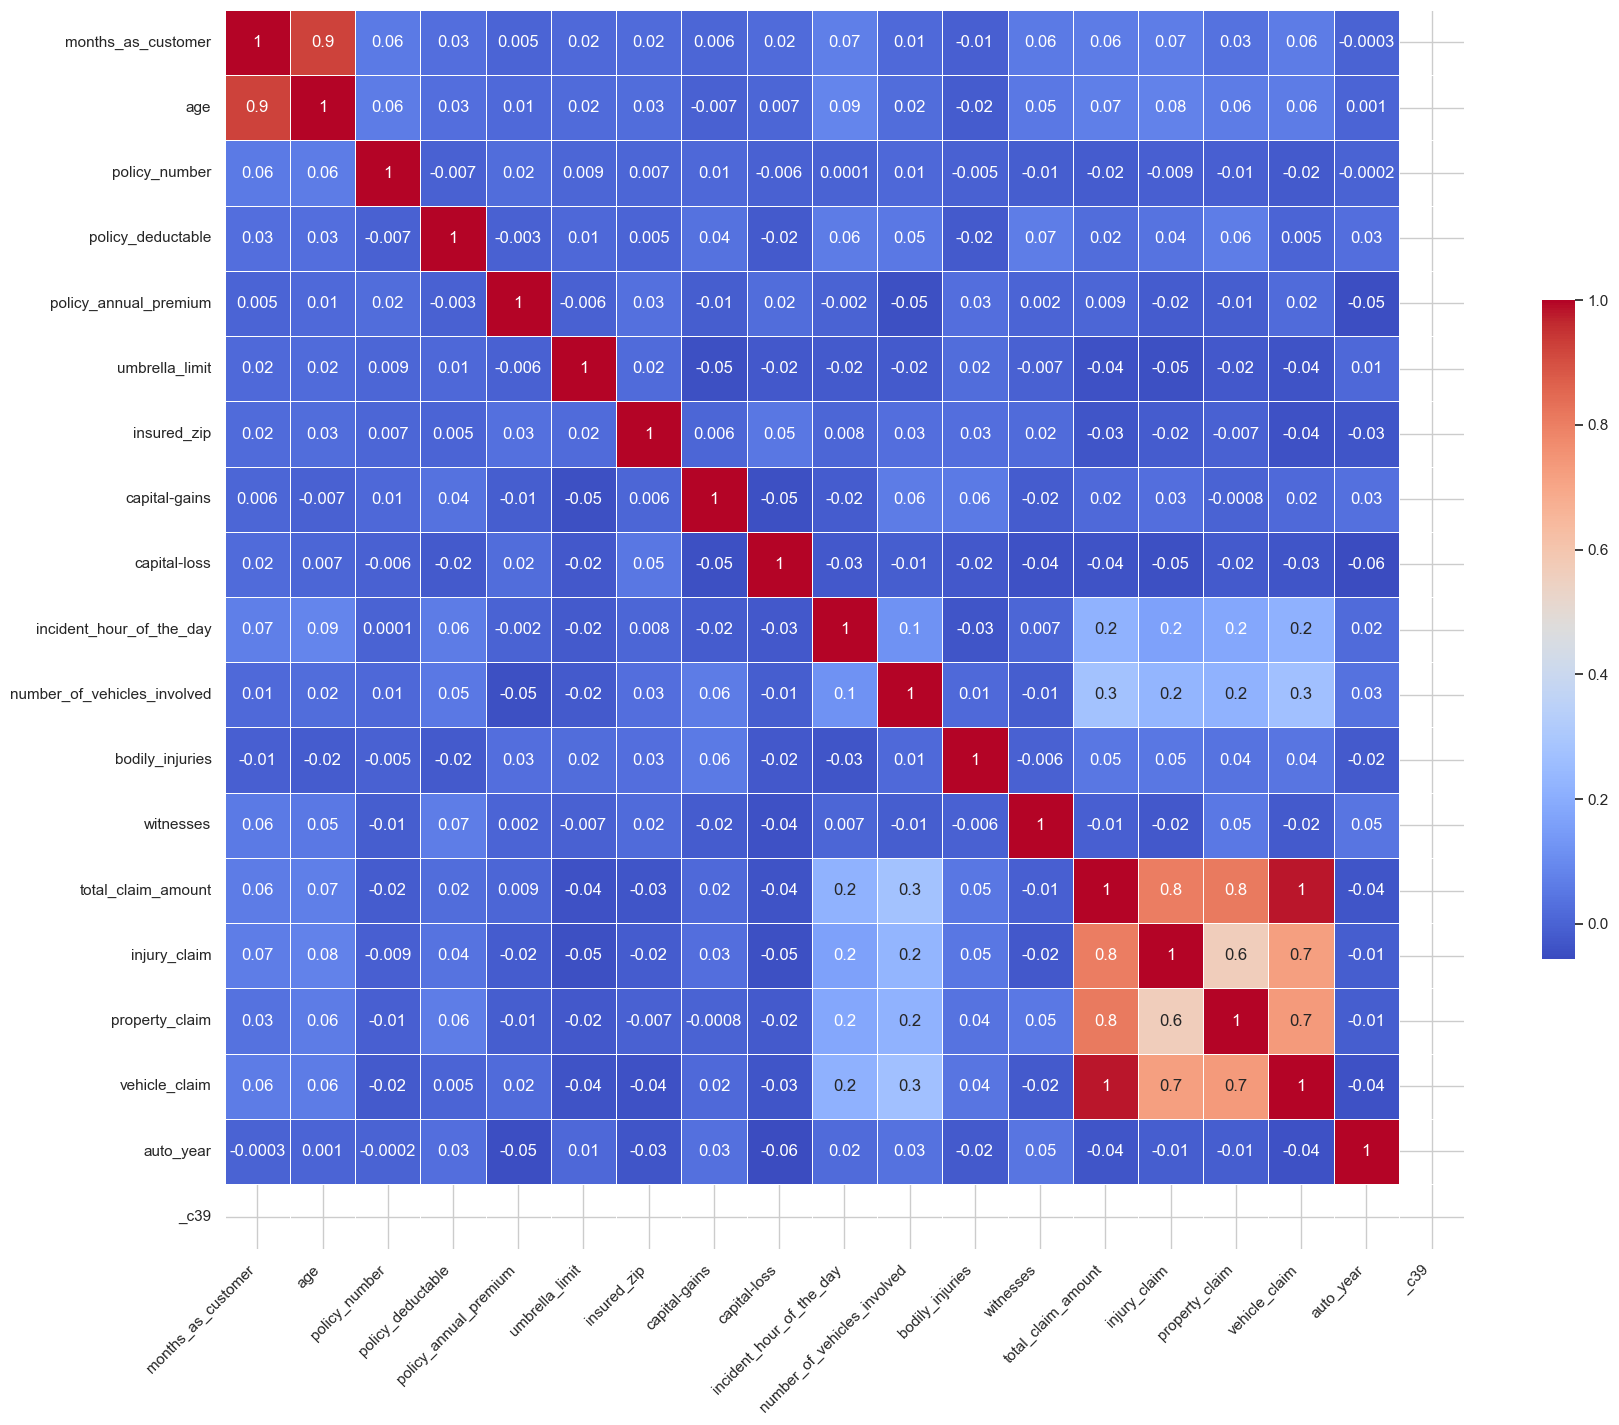

In [13]:
# Set up the figure
plt.figure(figsize=(18, 15))

# Compute the correlation matrix
corr = numerical_data.corr()

# Create a more readable heatmap
sns.heatmap(
    corr, 
    annot=True, 
    fmt='.1g', 
    linewidths=0.5, 
    cmap='coolwarm', 
    cbar_kws={'shrink': 0.5},  
    square=True  
)

# Customize and display the plot
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.tight_layout()  
plt.show()

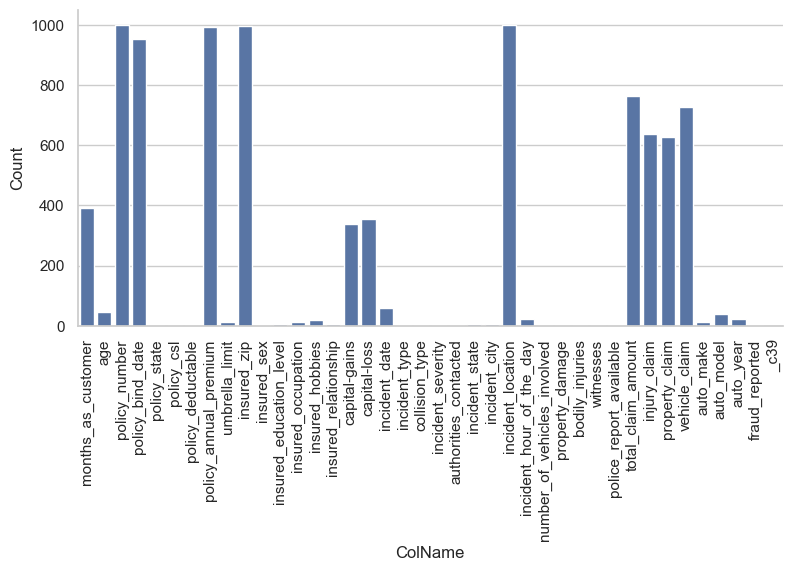

In [14]:

# Calculate the number of unique values per column
unique_counts = pd.DataFrame({
    'ColName': insure_data.columns,
    'Count': insure_data.nunique().values
})

# Set up Seaborn
sns.set_theme(style='whitegrid')

# Create a bar plot
sns.catplot(x='ColName', y='Count', kind='bar', data=unique_counts, height=4, aspect=2)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [15]:
unique_counts.sort_values(by='Count',ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [16]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

insure_data.drop(to_drop, inplace = True, axis = 1)

In [17]:
to_drop_from_numeric_data = ['policy_number','insured_zip','auto_year', '_c39']

numerical_data.drop(to_drop_from_numeric_data, inplace = True, axis = 1)

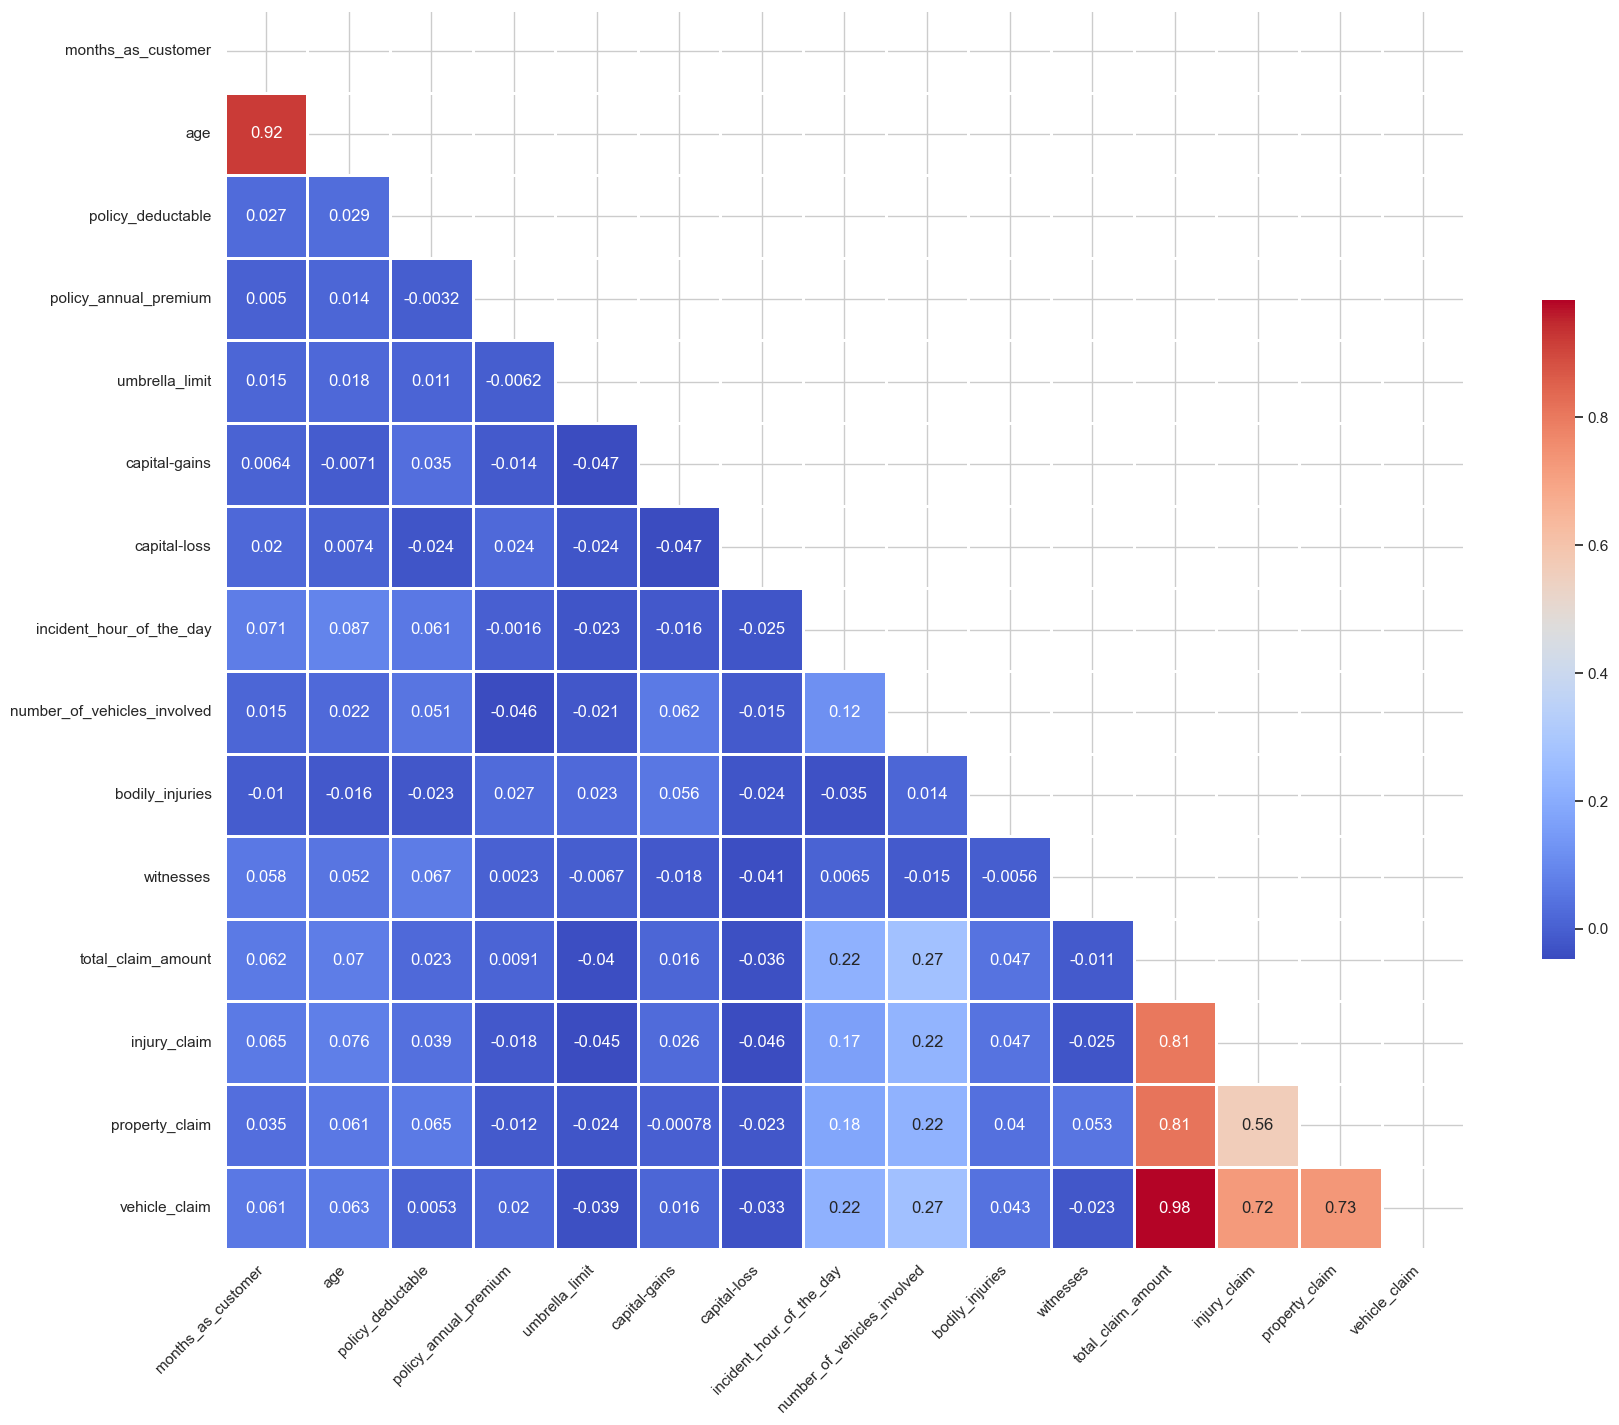

In [18]:
plt.figure(figsize=(18, 15))

corr = numerical_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(
    data=corr,
    mask=mask,
    annot=True, 
    fmt='.2g', 
    linewidth=1, 
    cmap='coolwarm',  
    cbar_kws={'shrink': 0.5}, 
    square=True  
)

plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

In [19]:
numerical_data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

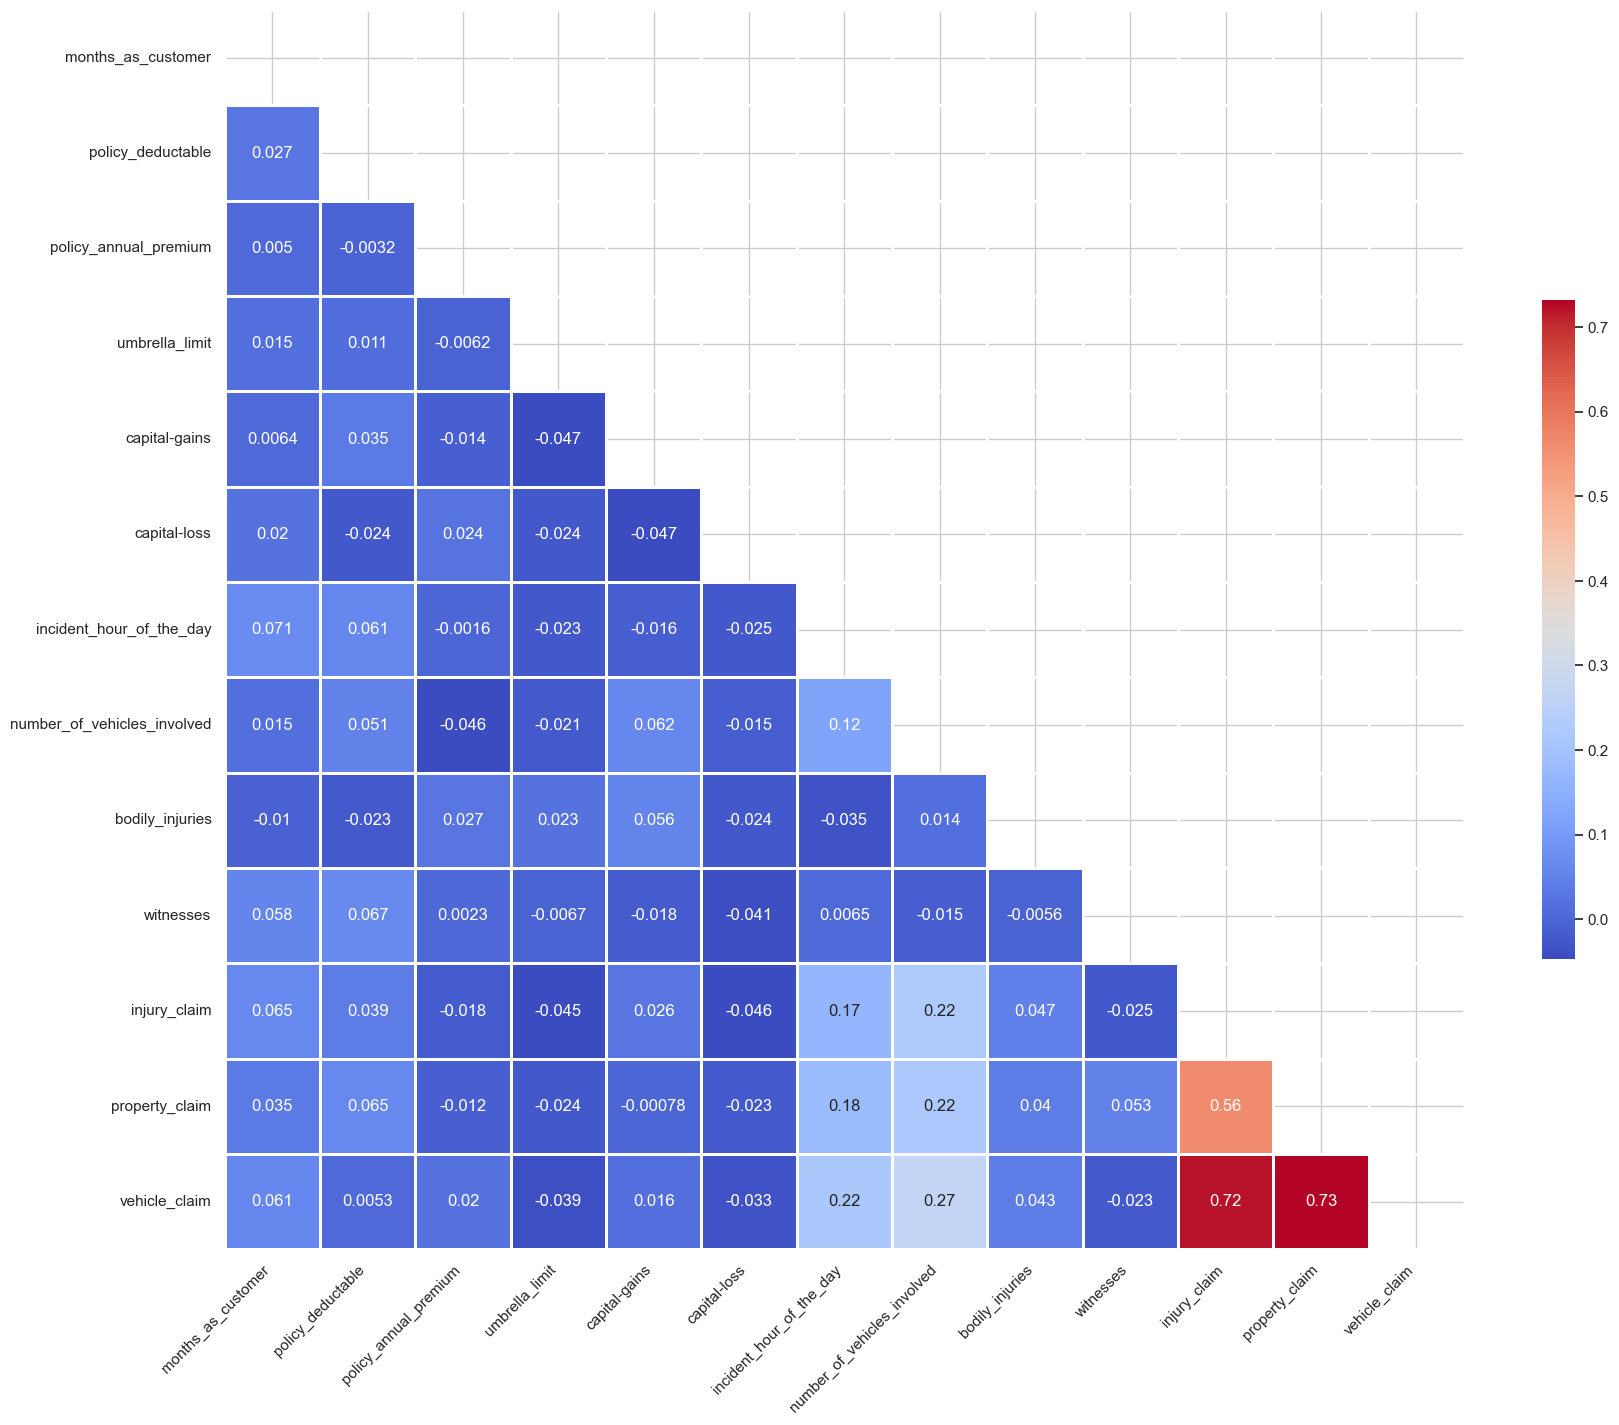

In [20]:
plt.figure(figsize=(18, 15))

# Compute the correlation matrix
corr = numerical_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

# Create a more readable heatmap
sns.heatmap(
    data=corr,
    mask=mask,
    annot=True, 
    fmt='.2g', 
    linewidth=1, 
    cmap='coolwarm',  
    cbar_kws={'shrink': 0.5},  
    square=True  
)

# Customize and display the plot
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

In [21]:
insure_data

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,...,1,YES,0,1,NO,87200,17440,8720,61040,N
996,285,41,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,...,1,YES,2,3,NO,108480,18080,18080,72320,N
997,130,34,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,...,3,NO,2,3,YES,67500,7500,7500,52500,N
998,458,62,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,...,1,NO,0,1,YES,46980,5220,5220,36540,N


In [22]:
# copy the dataset 
insure_data_clean = insure_data.copy()

In [23]:
# Drop the columns
insure_data_clean.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [24]:
insure_data_clean

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,20,1,YES,0,1,NO,17440,8720,61040,N
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,23,1,YES,2,3,NO,18080,18080,72320,N
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,4,3,NO,2,3,YES,7500,7500,52500,N
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,2,1,NO,0,1,YES,5220,5220,36540,N


In [25]:
# Get Target and Independent Features Seperated
X = insure_data_clean.drop('fraud_reported', axis = 1)
y = insure_data_clean['fraud_reported']

In [26]:
# Converting Label Columns into Numerical by doing One-Encoding
categorical_cols = X.select_dtypes(include = ['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [27]:
numerical_col = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_col, categorical_cols], axis = 1)


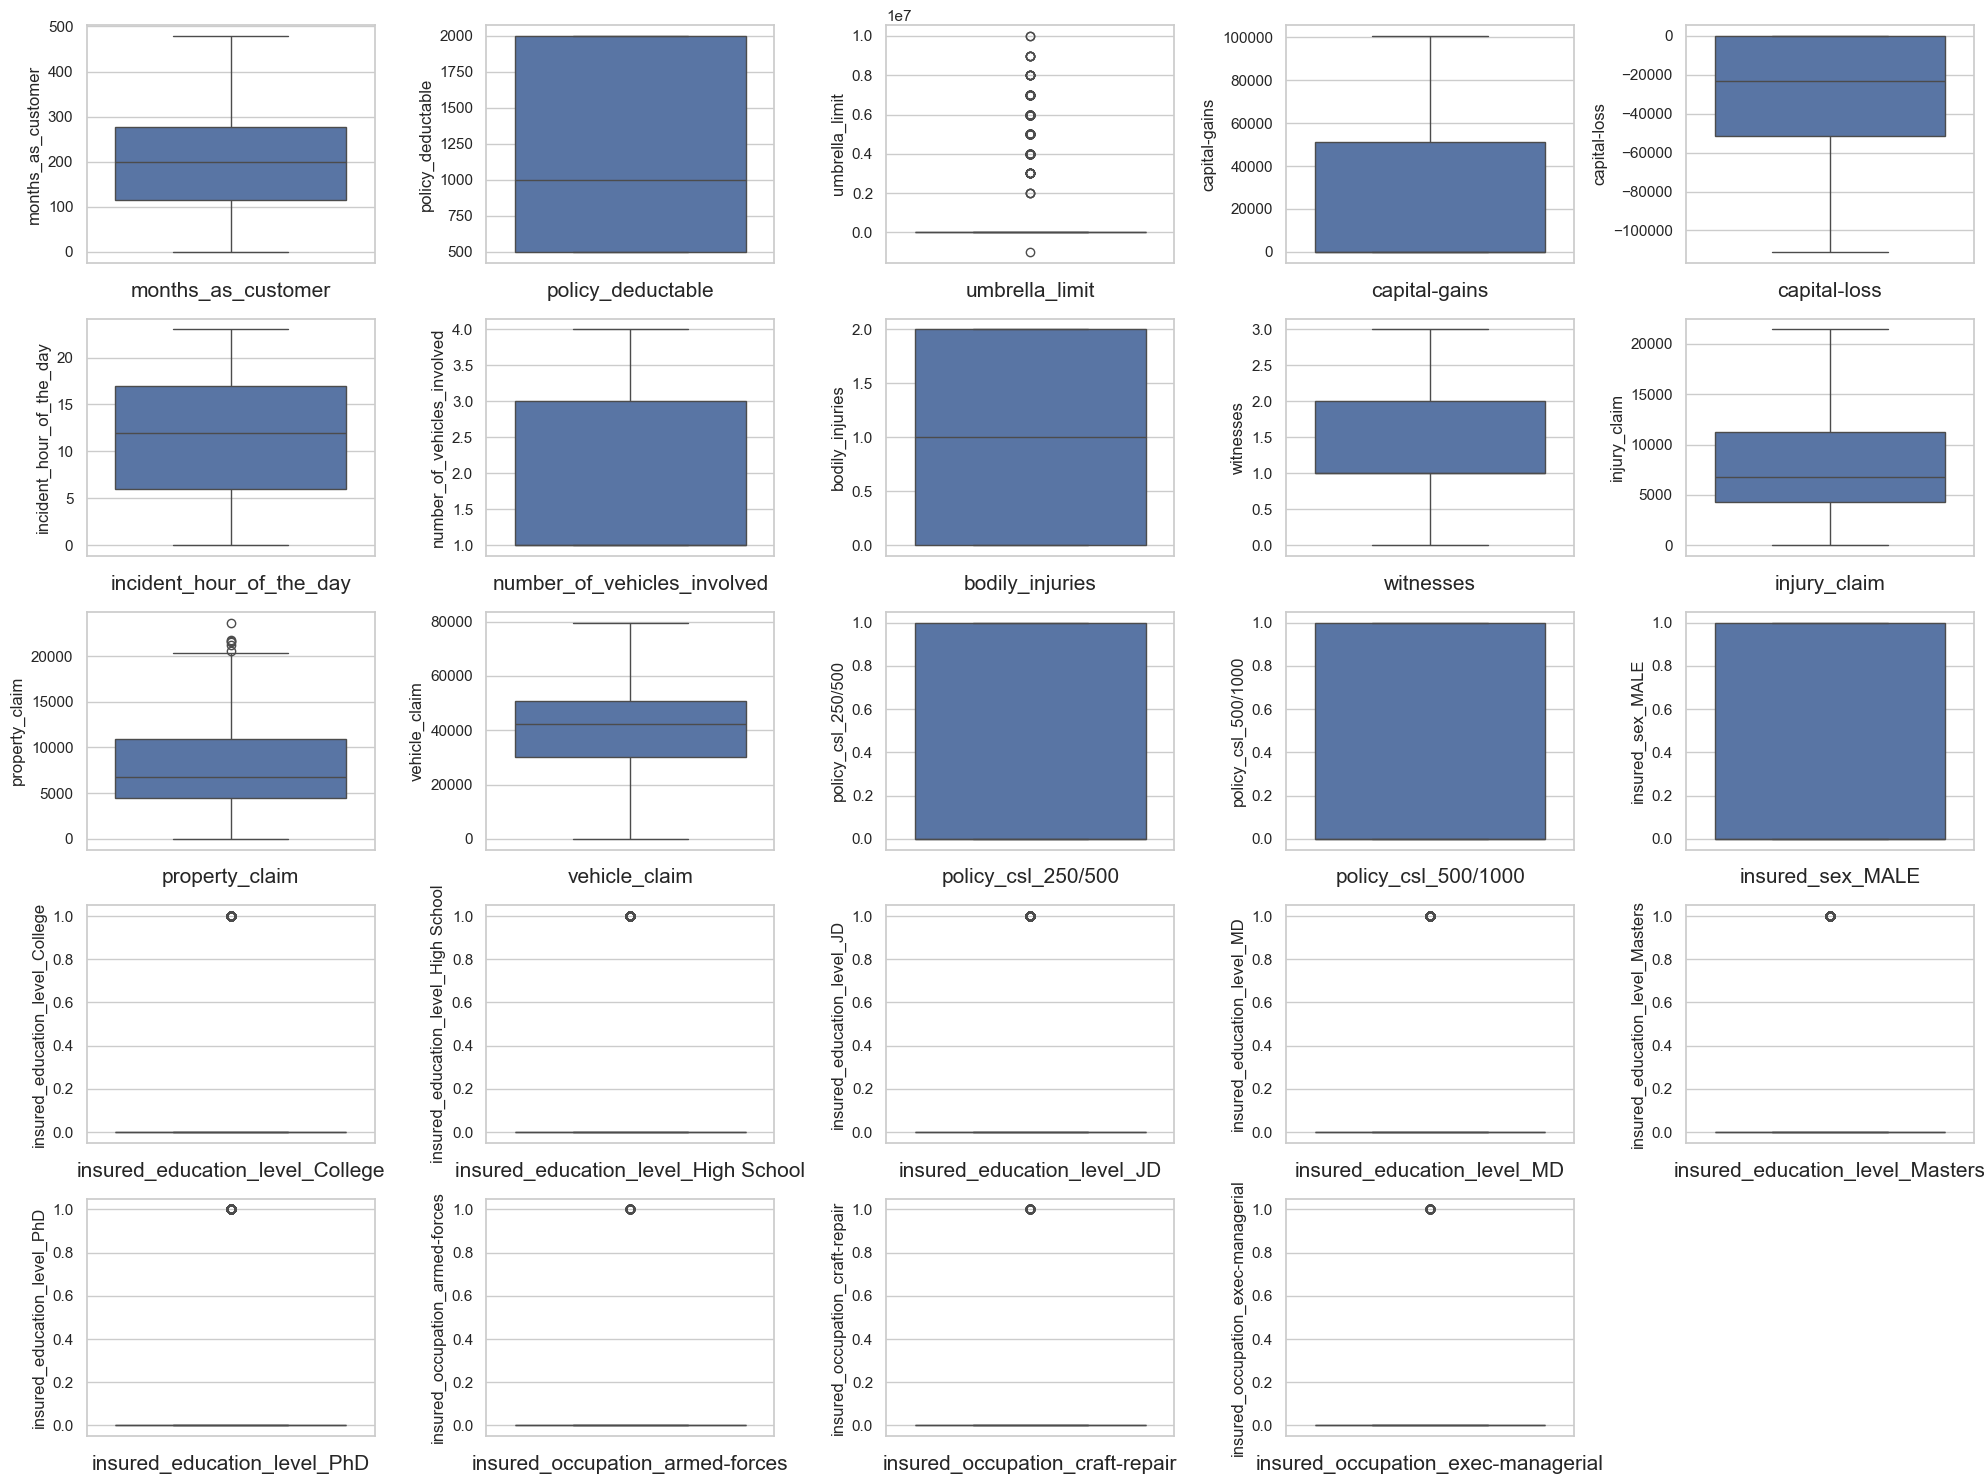

In [28]:
# Outlier Check

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the feature selection step
feature_selector = SelectKBest(score_func=f_classif, k=10)

# Create a preprocessing and feature selection pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector)])

# Fit and transform the training data
X_train_transformed = preprocessing_pipeline.fit_transform(X_train, y_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

In [30]:
X_train_transformed


array([[ 0.30141859,  1.39991138, -0.48930152, ...,  1.33592487,
         1.37540887,  1.32765371],
       [-1.24319263, -0.23026199, -0.48930152, ..., -0.19926161,
        -0.18984981,  0.05344995],
       [ 0.7226762 ,  1.39991138, -0.48930152, ..., -1.47011135,
        -1.48559375, -1.90929871],
       ...,
       [ 0.20488039, -0.23026199, -0.48930152, ...,  0.64458261,
         0.67052417, -0.04415987],
       [-0.91847322, -1.04534867, -0.48930152, ..., -0.03862621,
        -0.02606778,  1.07808917],
       [ 0.6349142 , -1.04534867, -0.48930152, ..., -1.53111214,
        -0.80144095, -0.69049511]])

In [31]:
X_test_transformed

array([[-1.76976464,  1.39991138, -0.48930152, ...,  1.72632991,
         1.77346141,  0.9382697 ],
       [-0.40945362, -0.23026199, -0.48930152, ..., -0.45749828,
        -0.45314498,  0.2085704 ],
       [ 1.56519141, -0.23026199, -0.48930152, ...,  1.21799001,
        -0.14631281,  0.47660167],
       ...,
       [ 1.19659101, -1.04534867,  0.7857513 , ..., -0.06099316,
         1.45004372,  0.26871915],
       [-1.15543063, -0.23026199, -0.48930152, ..., -0.18299474,
         1.20126088,  1.12821312],
       [-0.11106281, -0.23026199,  2.06080413, ..., -1.27897555,
        -1.29071386, -1.72568674]])

In [32]:
numerical_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [33]:
# Standardization of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [34]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
29,0.301419,1.399911,-0.489302,-0.905440,0.969265,-0.949950,-0.804695,1.219422,0.465374,1.335925,1.375409,1.327654
535,-1.243193,-0.230262,-0.489302,-0.905440,-1.587633,0.336664,-0.804695,0.000000,-1.320234,-0.199262,-0.189850,0.053450
695,0.722676,1.399911,-0.489302,0.759074,-1.608970,-0.378122,-0.804695,1.219422,-0.427430,-1.470111,-1.485594,-1.909299
557,-1.260745,-1.045349,2.060804,-0.905440,-0.328743,-0.949950,-0.804695,-1.219422,0.465374,-1.356243,-1.369495,-1.838598
836,0.441838,-0.230262,-0.489302,0.951544,0.969265,-1.664736,-0.804695,-1.219422,-0.427430,2.806044,-0.073751,0.981007


In [35]:

X_train[scaled_num_df.columns] = scaled_num_df

# Display the first few rows
X_train.head()


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
29,0.301419,1.399911,-0.489302,-0.905440,0.969265,-0.949950,-0.804695,1.219422,0.465374,1.335925,...,True,False,True,False,False,False,False,True,False,False
535,-1.243193,-0.230262,-0.489302,-0.905440,-1.587633,0.336664,-0.804695,0.000000,-1.320234,-0.199262,...,False,True,False,False,False,False,True,False,False,True
695,0.722676,1.399911,-0.489302,0.759074,-1.608970,-0.378122,-0.804695,1.219422,-0.427430,-1.470111,...,True,False,False,False,True,False,False,True,False,False
557,-1.260745,-1.045349,2.060804,-0.905440,-0.328743,-0.949950,-0.804695,-1.219422,0.465374,-1.356243,...,True,False,True,False,False,False,False,True,False,True
836,0.441838,-0.230262,-0.489302,0.951544,0.969265,-1.664736,-0.804695,-1.219422,-0.427430,2.806044,...,True,False,False,True,False,False,False,True,False,True


In [36]:
# started with Support Vector Classifier

from sklearn.svm import SVC

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",svc_model_train_acc)
print("Testing Accuracy: ", svc_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.86125
Testing Accuracy:  0.725
[[145   0]
 [ 55   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       145
           Y       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",knn_model_train_acc)
print("Testing Accuracy: ", knn_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.7625
Testing Accuracy:  0.725
[[145   0]
 [ 55   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       145
           Y       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



In [40]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ",decision_tree_model_train_acc)
print("Test accuracy: ",decision_tree_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.365
[[ 43 102]
 [ 25  30]]
              precision    recall  f1-score   support

           N       0.63      0.30      0.40       145
           Y       0.23      0.55      0.32        55

    accuracy                           0.36       200
   macro avg       0.43      0.42      0.36       200
weighted avg       0.52      0.36      0.38       200



In [42]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(decision_tree_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [43]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.8162499999999999


In [44]:
decision_tree_model = grid_search.best_estimator_
y_pred = decision_tree_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {decision_tree_model_train_acc}")
print(f"Test accuracy of Decision Tree is : {decision_tree_model_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8225
Test accuracy of Decision Tree is : 0.78
[[120  25]
 [ 19  36]]
              precision    recall  f1-score   support

           N       0.86      0.83      0.85       145
           Y       0.59      0.65      0.62        55

    accuracy                           0.78       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.79      0.78      0.78       200



In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140, random_state= 42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ", rf_model_train_acc)
print("Test accuracy: ", rf_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.745
[[129  16]
 [ 35  20]]
              precision    recall  f1-score   support

           N       0.79      0.89      0.83       145
           Y       0.56      0.36      0.44        55

    accuracy                           0.74       200
   macro avg       0.67      0.63      0.64       200
weighted avg       0.72      0.74      0.73       200



In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(estimator = decision_tree_model, random_state = 42)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada_model, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/austin/Desktop/PROJECTS/Final Year P/pythonProject1/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/austin/Desktop/PROJECTS/Final Year P/pythonProject1/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/austin/Desktop/PROJECTS/Final Year P/pythonProject1/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/austin/Desktop/PROJECTS/Final Year P/pythonProject1/.venv/lib/python3.11/site-packages/sklearn/ense

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                           min_samples_leaf=4,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [49]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 120}
0.8175000000000001


In [50]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(X_test)

In [51]:
ada_train_acc = accuracy_score(y_train, ada_model.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.81875
Test accuracy of Ada Boost is : 0.78
[[120  25]
 [ 19  36]]
              precision    recall  f1-score   support

           N       0.86      0.83      0.85       145
           Y       0.59      0.65      0.62        55

    accuracy                           0.78       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.79      0.78      0.78       200



In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.93125
Test Accuracy of Gradient Boosting Classifier is 0.35 

Confusion Matrix :- 
[[ 24 121]
 [  9  46]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.73      0.17      0.27       145
           Y       0.28      0.84      0.41        55

    accuracy                           0.35       200
   macro avg       0.50      0.50      0.34       200
weighted avg       0.60      0.35      0.31       200



In [53]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70, n_estimators = 100, max_depth = 3, learning_rate = 0.1, random_state = 42 )
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.93625
Test Accuracy of Stochastic Gradient Boosting is 0.335 

Confusion Matrix :- 
[[ 14 131]
 [  2  53]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.88      0.10      0.17       145
           Y       0.29      0.96      0.44        55

    accuracy                           0.34       200
   macro avg       0.58      0.53      0.31       200
weighted avg       0.71      0.34      0.25       200



In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [55]:
y_test = le.fit_transform(y_test)

In [56]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc_model), ('knn_model', knn_model),  ('Decision Tree', decision_tree_model), ('Random Forest', rf_model),
               ('Ada Boost', ada_model), ('Gradient Boosting Classifier', gb), ('SGB', sgb)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

In [57]:
vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.91375
Test accuracy of Voting Classifier is : 0.77
[[121  24]
 [ 22  33]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       145
           1       0.58      0.60      0.59        55

    accuracy                           0.77       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.77      0.77      0.77       200



In [58]:
models = pd.DataFrame({
    'Model' : ['svc_model', 'knn_model', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Voting Classifier'],
    'Score' : [svc_model_test_acc, knn_model_test_acc, decision_tree_model_test_acc, rf_model_test_acc, ada_test_acc, gb_acc, sgb_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.780
4,Ada Boost,0.780
7,Voting Classifier,0.770
3,Random Forest,0.745
0,svc_model,0.725
1,knn_model,0.725
5,Gradient Boost,0.350
6,SGB,0.335


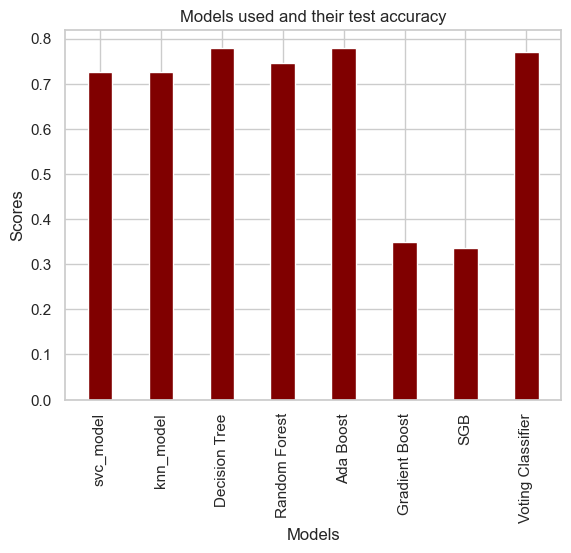

In [59]:
plt.bar(models['Model'],models['Score'], width=0.4, color='maroon')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.title("Models used and their test accuracy")
plt.show()